### The German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [1]:
# !wget -c http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
# !unzip FullIJCNN2013.zip

In [2]:
import numpy as np
import cv2
import random

IMG_HEIGHT = 600
SIGN_SIZE = (139, 139)

# Function for reading the images
def readImages(rootpath, folder_path, images_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    for num in images_range:
        file = "{:05d}".format(num) + '.ppm'
        filename = rootpath + '/' + file
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)
        
        
    files_to_load = ["{:05d}".format(i) + '.ppm' for i in images_range]
    yes_file_data = np.genfromtxt('02_Yes_Labels/Bboxes_2.txt', delimiter=';', dtype=str, usecols=range(0, 5))
    prev_filename = ''

    for bbox in yes_file_data:
        filename = bbox[0]
        if filename != prev_filename:
            img_pre = cv2.imread('FullIJCNN2013/' + filename, cv2.IMREAD_COLOR)
            scale = IMG_HEIGHT / float(img_pre.shape[0])
            img = cv2.resize(img_pre, (int(img_pre.shape[1]*scale),int(img_pre.shape[0]*scale)))
        if filename in files_to_load:
            sign = img[int(float(bbox[2])):int(float(bbox[4])), int(float(bbox[1])):int(float(bbox[3]))]
            files.append('FullIJCNN2013/' + filename)
            signs.append(sign)
            bboxes.append(bbox[1:5])
            labels.append('1')
        prev_filename = filename
    
    obj = len(labels)
    no_num = 0
    range_loop = list(images_range)
    random.shuffle(range_loop)
    for num in range_loop:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)
        
        no_file_data = np.genfromtxt(folder_path + filename[-9:-4:] + '.txt', delimiter=';', dtype=float, usecols=range(0, 6))

        img = img_resized

        for bbox in no_file_data:
            if no_num == obj:
                break
            if bbox[4] == 0:
                no_num = no_num + 1
                sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
                files.append(filename)
                signs.append(sign)
                bboxes.append(bbox[0:4])
                labels.append(str(int(bbox[4])))
        if no_num == len(yes_file_data):
                break
    return images, files, signs, bboxes, labels

In [3]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', '01_Bboxes_Generated/00_20190509_224_224_05/',range(0,600))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', '01_Bboxes_Generated/00_20190509_224_224_05/', range(600,900))

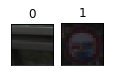

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# np.unique(train_files)

In [6]:
# np.sort(list(train_images.keys()))

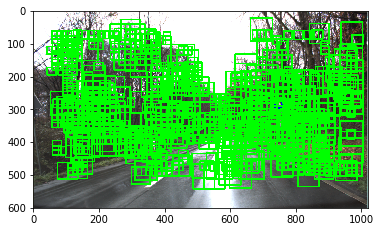

In [7]:
# No tiene por que haber 0 de todas las imagenes, ya que se han equilibrado al principio
filename = train_files[20123]
# Draw predictions
aux = train_images.get(filename)[0].copy()
ind = np.ndarray.tolist(np.where(np.asarray(train_files) == filename)[0])
bb = [train_bboxes[i] for i in ind]
ll = [train_labels[i] for i in ind]
for i in range(0,len(bb)):
    bbox = bb[i]
    if ll[i] == '0':
        cv2.rectangle(aux, (int(bbox[0]),int(bbox[1])), (int(bbox[2]),int(bbox[3])), (0,255,0), 3)
    else: 
        cv2.rectangle(aux, (int(bbox[0]),int(bbox[1])), (int(bbox[2]),int(bbox[3])), (255,0,0), 3)
plt.imshow(cv2.cvtColor(aux, cv2.COLOR_BGR2RGB))
plt.show()

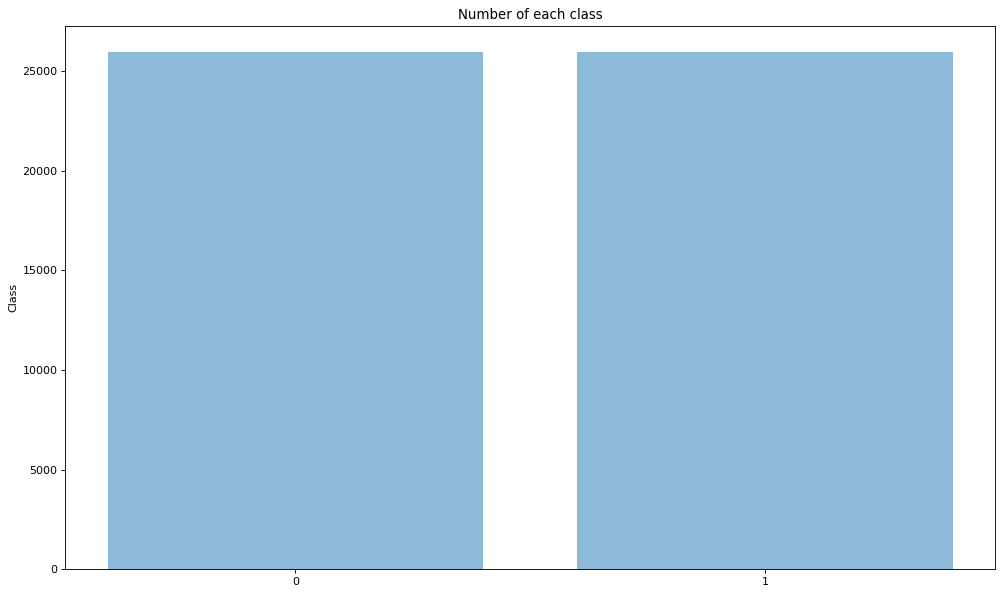

In [8]:
unique, counts = np.unique(train_labels, return_counts=True)

plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(unique))

plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Class')
plt.title('Number of each class')
 
plt.show()

In [9]:
len(test_labels)

32496

In [10]:
import random

ind_label = np.ndarray.tolist(np.where((np.asarray(train_labels) == '1')) [0])
ind_no_label = np.ndarray.tolist(np.where((np.asarray(train_labels) == '0')) [0])

ind_label_end = random.choices(ind_label, k=9000)
ind_no_label_end = random.choices(ind_no_label, k=6500)



##### TEST

test_ind_label = np.ndarray.tolist(np.where((np.asarray(test_labels) == '1')) [0])
test_ind_no_label = np.ndarray.tolist(np.where((np.asarray(test_labels) == '0')) [0])

test_ind_no_label_end = random.choices(test_ind_label , k=1000)
test_ind_label_end = random.choices(test_ind_no_label, k=1000)

In [11]:
train_files = [train_files[i] for i in ind_label_end  + ind_no_label_end]
train_signs = [train_signs[i] for i in ind_label_end  + ind_no_label_end]
train_bboxes = [train_bboxes[i] for i in ind_label_end  + ind_no_label_end]
train_labels = [train_labels[i] for i in ind_label_end  + ind_no_label_end]

test_signs = [test_signs[i] for i in test_ind_label_end  + test_ind_no_label_end]
test_labels = [test_labels[i] for i in test_ind_label_end  + test_ind_no_label_end]

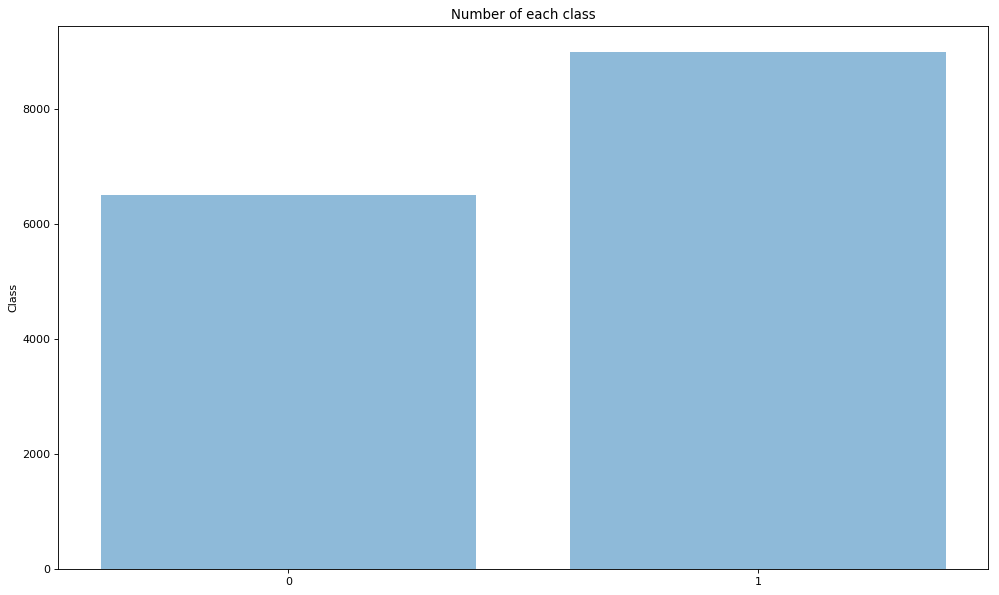

In [12]:
unique, counts = np.unique(train_labels, return_counts=True)

plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(unique))

plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Class')
plt.title('Number of each class')
 
plt.show()

In [13]:
# Leer data clasificada anteriormente
data = np.genfromtxt('Training_detection_results/Xception_0_09.txt', delimiter=';', dtype=str, usecols=range(0, 5))
data_files = [data[i][0] for i in range(len(data))]
for i in range(0,600):
    filename = 'FullIJCNN2013' + '/' + "{:05d}".format(i) + '.ppm'

    if filename in data_files:
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        for idx in [i for i, x in enumerate(data_files) if x == filename]:
            bbox_add = data[idx][1:5]
            train_files.append(filename)
            train_signs.append(img[int(float(bbox_add[1])):int(float(bbox_add[3])), \
                                   int(float(bbox_add[0])):int(float(bbox_add[2]))])
            train_bboxes.append(np.asarray([int(float(bbox_add[0])),\
                                            int(float(bbox_add[1])),\
                                            int(float(bbox_add[2])),\
                                            int(float(bbox_add[3]))]))
            train_labels.append('0')

In [14]:
# Leer data clasificada anteriormente
data = np.genfromtxt('Training_detection_results/Xception_0.txt', delimiter=';', dtype=str, usecols=range(0, 5))
data_files = [data[i][0] for i in range(len(data))]
for i in range(0,600):
    filename = 'FullIJCNN2013' + '/' + "{:05d}".format(i) + '.ppm'

    if filename in data_files:
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        for idx in [i for i, x in enumerate(data_files) if x == filename]:
            bbox_add = data[idx][1:5]
            train_files.append(filename)
            train_signs.append(img[int(float(bbox_add[1])):int(float(bbox_add[3])), \
                                   int(float(bbox_add[0])):int(float(bbox_add[2]))])
            train_bboxes.append(np.asarray([int(float(bbox_add[0])),\
                                            int(float(bbox_add[1])),\
                                            int(float(bbox_add[2])),\
                                            int(float(bbox_add[3]))]))
            train_labels.append('0')

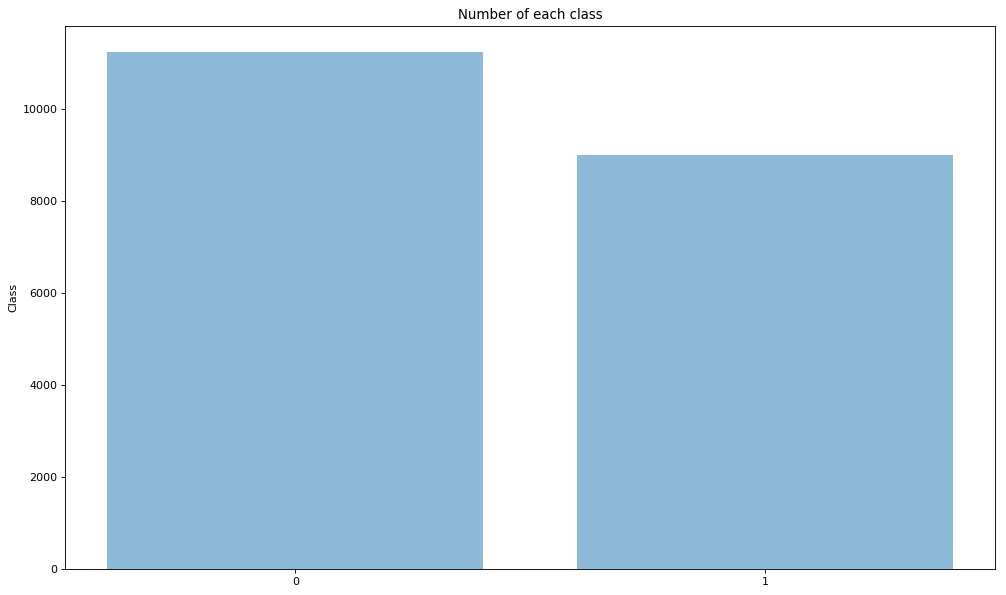

In [15]:
unique, counts = np.unique(train_labels, return_counts=True)

plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(unique))

plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Class')
plt.title('Number of each class')
 
plt.show()

In [16]:
for i in range(0, len(train_signs)):
    train_signs[i] = cv2.resize(train_signs[i], SIGN_SIZE)

In [17]:
for i in range(0, len(test_signs)):
    test_signs[i] = cv2.resize(test_signs[i], SIGN_SIZE)

In [18]:
len(train_signs)

20242

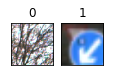

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# len(train_signs)

In [21]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf

# tf.get_default_session().close()
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
session.as_default()

from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
train_size = int(len(train_signs)*0.8)
tr_signs = np.array(train_signs)[0:train_size]
tr_labels = np.array(train_labels)[0:train_size]
va_signs = np.array(train_signs)[train_size:len(train_signs)]
va_labels = np.array(train_labels)[train_size:len(train_signs)]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')

#255 because of rgb 255

tr_signs /= 225.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

Using TensorFlow backend.


In [22]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

## Assignment 3.3: Transfer learning

In [23]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, Callback

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.t_loss = []
        self.t_acc = []

    def on_epoch_end(self, epoch, logs):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        logs['test_loss'] = loss
        logs['test_acc'] = acc
        print('\nT_loss: {}, T_acc: {}\n'.format(loss, acc))



### 1st train

### <font color='red'>CHANGE THIS EVERY TIME TO SAVE ANOTHER MODEL</font>

In [24]:
callbacks = [ModelCheckpoint(filepath='Yes_No_Inception_1.h5', monitor='val_loss', save_best_only=True),
             TensorBoard(log_dir='logs/{}'.format(time())),
             TestCallback((te_signs, te_labels))]

In [25]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalMaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam


baseline = InceptionV3(include_top=False, weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))

for layer in baseline.layers:
    layer.trainable = True
# add your head on top
x = baseline.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=baseline.input, outputs=predictions)

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 139, 139, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 69, 69, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 69, 69, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 69, 69, 32)   0           batch_normalization_1[0][0]      
_____________________________________

In [26]:
### train_steps = int(len(tr_signs) / 16)
# valid_steps = int(len(va_signs) / 16)

data = model.fit(tr_signs, tr_labels, batch_size=6, epochs=10, validation_data=(va_signs, va_labels), verbose=1, callbacks=callbacks)
start = time()
loss, acc = model.evaluate(te_signs, te_labels, verbose=0)
end = time()

print('Xception (without Data Augmentation) took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Instructions for updating:
Use tf.cast instead.
Train on 16193 samples, validate on 4049 samples
Epoch 1/10
16193/16193 [==============================] - 713s 44ms/step - loss: 0.5589 - acc: 0.7296 - val_loss: 1.3905 - val_acc: 0.8076

T_loss: 0.5996179707050323, T_acc: 0.873

Epoch 2/10
16193/16193 [==============================] - 685s 42ms/step - loss: 0.3159 - acc: 0.8808 - val_loss: 0.2077 - val_acc: 0.9308

T_loss: 0.27101458816230295, T_acc: 0.907

Epoch 3/10
16193/16193 [==============================] - 693s 43ms/step - loss: 0.2432 - acc: 0.9115 - val_loss: 0.2498 - val_acc: 0.8975

T_loss: 0.24291015627980234, T_acc: 0.9255

Epoch 4/10
16193/16193 [==============================] - 684s 42ms/step - loss: 0.2154 - acc: 0.9241 - val_loss: 0.1705 - val_acc: 0.9442

T_loss: 0.19425973504781724, T_acc: 0.941

Epoch 5/10
16193/16193 [==============================] - 692s 43ms/step - loss: 0.1862 - acc: 0.9318 - val_loss: 0.1155 - val_acc: 0.9558

T_loss: 0.11822685586288571, T_

In [25]:
## We load our model
from keras.models import load_model
model2 = load_model('Yes_No_Inception_1.h5')

In [26]:
start = time()
loss, acc = model2.evaluate(te_signs, te_labels, verbose=0)
end = time()

print('Xception (without Data Augmentation) took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Xception (without Data Augmentation) took 12.782033681869507 seconds
Test loss: 0.02081404027176859 - Accuracy: 0.9935
